In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

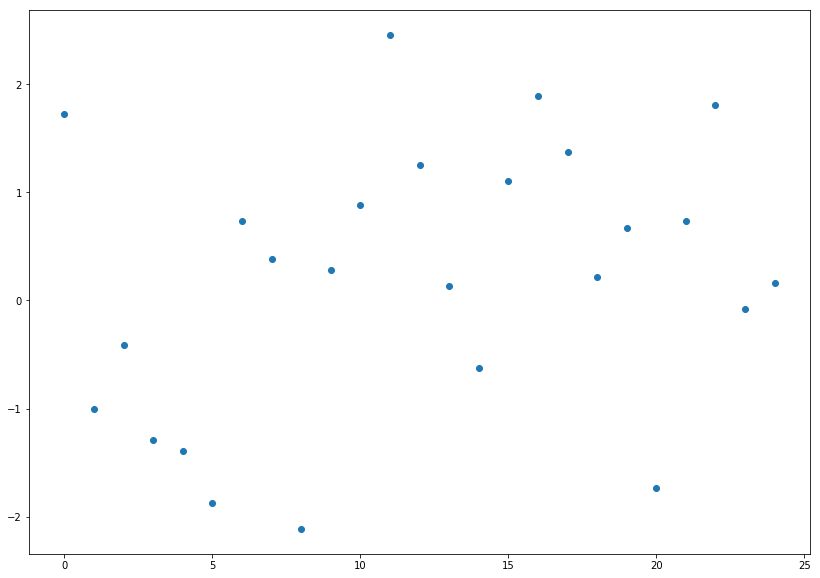

In [2]:
# Definte parametes of the MA process of order 2 (MA(2))

mu = 4.0
theta1 = [0.5, 0.3, 0.1, 0.01]
theta2 = [0.3, 0.3, 0.3 0.3]
std_eps = 1.3

# Define number of time steps
N = 25

# Generate time series of white noise with mean=0 and std=std_eps
np.random.seed(24)
eps_t = np.random.normal(0, std_eps, N)

# Plot the time series of white noise
plt.figure(figsize=(14,10))
plt.plot(eps_t,'o')
plt.show()

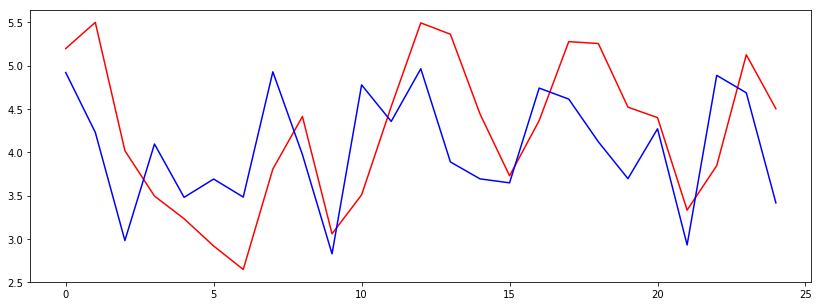

In [4]:
# Create storage container for our MA process
Z1_t = np.zeros((N,1))
Z2_t = np.zeros((N,1))
T = np.arange(0,N,1)

# Create the values of the noise process at time steps t-1 and t-2 to initiate the model
eps_tm1 = np.random.normal(0, std_eps, 1)
eps_tm2 = np.random.normal(0, std_eps, 1)

for t in T:
    if t==0:
        Z1_t[t] = mu + theta1*eps_tm1 + theta2*eps_tm2
    if t==1:
        Z1_t[t] = mu + theta1*eps_t[t-1] + theta2*eps_tm1
    if t>1:
        Z1_t[t] = mu + theta1*eps_t[t-1] + theta2*eps_t[t-2]
        
for i in np.arange(0, 4, 1):
    for t in T:
        if t==0:
            Z2_t[i] = mu + theta1*eps_tm1 - theta2*eps_tm2
        if t==1:
            Z2_t[i] = mu + theta1*eps_t[t-1] - theta2*eps_tm1
        if t>1:
            Z2_t[i] = mu + theta1*eps_t[t-1] - theta2*eps_t[t-2]        
        
# Plot the resulting time series
plt.figure(figsize=(14,5))
plt.plot(T, Z1_t, 'r-')
plt.plot(T, Z2_t, 'b-')
plt.show()